In [1]:
from mxnet import nd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))

In [3]:
net.load_parameters('net.params')

In [4]:
trainsformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)
])

In [5]:
mnist_valid = datasets.FashionMNIST(train=False)
X, y = mnist_valid[:10]
preds = []
for x in X:
    x = trainsformer(x).expand_dims(axis=0)
    pred = net(x).argmax(axis=1)
    preds.append(pred.astype('int32').asscalar())

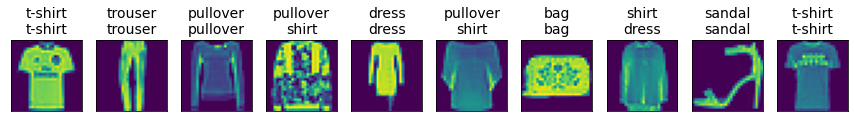

In [7]:
_, figs = plt.subplots(1, 10, figsize=(15,15))
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

for f, x, yi, pyi in zip(figs, X, y, preds):
    f.imshow(x.reshape(28, 28).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[yi]+'\n'+text_labels[pyi])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
from mxnet.gluon.model_zoo import vision
from mxnet.gluon.utils import download
from mxnet import image

net = vision.resnet50_v2(pretrained=True)

In [9]:
url = 'http://data.mxnet.io.s3-website-us-west-1.amazonaws.com/models/imagenet/synset.txt'
fname = download(url)
with open(fname, 'r') as f:
    text_labels = [' '.join(l.split()[1:]) for l in f]

In [11]:
url = 'https://gitee.com/whoring-brigade/stack-world-flutter/raw/master/assets/pics/365px-Golden_Retriever_medium-to-light-coat.jpg'
fname = download(url)
x = image.imread(fname)

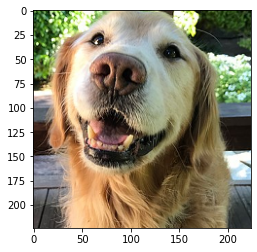

In [12]:
x = image.resize_short(x, 256)
x, _ = image.center_crop(x, (224, 224))
plt.imshow(x.asnumpy())
plt.show()

In [13]:
def transformer(data):
    data = data.transpose((2, 0, 1)).expand_dims(axis=0)
    rgb_mean = nd.array([0.485, 0.456, 0.406]).reshape((1, 3, 1, 1))
    rgb_std = nd.array([0.229, 0.224, 0.225]).reshape((1, 3, 1, 1))
    return (data.astype('float32') / 255 - rgb_mean) / rgb_std

In [14]:
prob = net(transformer(x)).softmax()
idx = prob.topk(k=5)[0]
for i in idx:
    i = int(i.asscalar())
    print('With prob = %.5f, it contains %s' % (prob[0, i].asscalar(), text_labels[i]))

With prob = 0.98323, it contains golden retriever
With prob = 0.00729, it contains English setter
With prob = 0.00297, it contains Irish setter, red setter
With prob = 0.00224, it contains cocker spaniel, English cocker spaniel, cocker
With prob = 0.00147, it contains Labrador retriever
